<a href="https://colab.research.google.com/github/bbinkiewicz/WSiZ_SI_Lab/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metryka domyślna:  0.3859729235058752
Metryka r2:  0.3859729235058752
Współczynniki regresji:
 [-1.97276668]


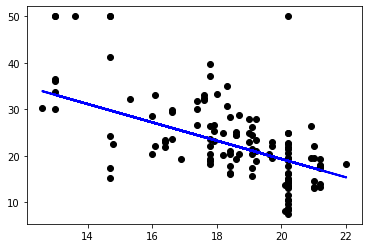

uzycie metryki max_error:
[-20.34193906 -25.39149682 -26.71468572 -31.17196363 -15.09719462]
uzycie metryki neg_median_absolute_error:
[-2.91263479 -5.30850318 -4.09971088 -4.92803637 -5.16025107]


In [91]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline



# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
boston_df['target'] = np.array(list(boston_nieruchomosci['target']))

#do przewidywania cen wybrana zostala cecha PTRATIO
PTRATIO = boston_nieruchomosci['data'][:, np.newaxis, 10]

# Stworzenie regresora liniowego
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(PTRATIO, boston_nieruchomosci['target'])
linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)


# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

print('uzycie metryki max_error:')
cv_score_ev = cross_val_score(linreg, PTRATIO, boston_nieruchomosci.target, cv=5, scoring='max_error')
print(cv_score_ev)

print('uzycie metryki neg_median_absolute_error:')
cv_score_mse = cross_val_score(linreg, PTRATIO, boston_nieruchomosci.target, cv=5, scoring='neg_median_absolute_error')
print(cv_score_mse)
